## Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading data

In [2]:
races = pd.read_csv("races.csv")
drivers = pd.read_csv("drivers.csv")
sprint = pd.read_csv("sprint_results.csv")
quali = pd.read_csv("qualifying.csv")
results = pd.read_csv("results.csv")
circuits = pd.read_csv("circuits.csv")
constructors = pd.read_csv("constructors.csv")

### Race data

In [3]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [4]:
races = races.drop(columns=["url", "fp1_date", "fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date", "quali_time", "sprint_date", "sprint_time", "time"])
races = races.rename(columns={"name" : "race_name"})
races["race_name"] = races["race_name"].apply(lambda x : x.replace("Grand Prix", "GP"))
races.head()

,raceId,year,round,circuitId,race_name,date
0,1,2009,1,1,Australian GP,2009-03-29
1,2,2009,2,2,Malaysian GP,2009-04-05
2,3,2009,3,17,Chinese GP,2009-04-19
3,4,2009,4,3,Bahrain GP,2009-04-26
4,5,2009,5,4,Spanish GP,2009-05-10


### Drivers data

In [5]:
drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [6]:
drivers = drivers.drop(columns="url")
drivers["driver_name"] = drivers["forename"] + " " + drivers["surname"]
drivers = drivers.drop(columns=["forename", "surname"])
drivers = drivers.rename(columns={"nationality" : "driver_nat"})
drivers.head()

,driverId,driverRef,number,code,dob,driver_nat,driver_name
0,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen


### Constructors data

In [7]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
constructors = constructors.drop(columns="url")
constructors = constructors.rename(columns={"name" : "constructor_name", "nationality" : "constructor_nat"})
constructors.head()

,constructorId,constructorRef,constructor_name,constructor_nat
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


### Circuits data

In [9]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [10]:
circuits = circuits.drop(columns=["lat", "lng", "alt", "url"])
circuits = circuits.rename(columns={"name" : "circuit_name"})
circuits.head()

,circuitId,circuitRef,circuit_name,location,country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey


###### Results table is used to combine all the tables

In [11]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [12]:
df = results.copy()
df = df.merge(drivers, on="driverId")
df = df.merge(races, on="raceId")
df = df.merge(circuits, on="circuitId")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number_x         25660 non-null  object 
 5   grid             25660 non-null  int64  
 6   position         25660 non-null  object 
 7   positionText     25660 non-null  object 
 8   positionOrder    25660 non-null  int64  
 9   points           25660 non-null  float64
 10  laps             25660 non-null  int64  
 11  time             25660 non-null  object 
 12  milliseconds     25660 non-null  object 
 13  fastestLap       25660 non-null  object 
 14  rank             25660 non-null  object 
 15  fastestLapTime   25660 non-null  object 
 16  fastestLapSpeed  25660 non-null  object 
 17  statusId    

In [15]:
df = df.rename(columns={"number_y" : "driver_number", "number_x" : "car_number"})
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'car_number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'driver_number', 'code',
       'dob', 'driver_nat', 'driver_name', 'year', 'round', 'circuitId',
       'race_name', 'date', 'circuitRef', 'circuit_name', 'location',
       'country'],
      dtype='object')

In [16]:
df.head()

,resultId,raceId,driverId,constructorId,car_number,grid,position,positionText,positionOrder,points,...,driver_name,year,round,circuitId,race_name,date,circuitRef,circuit_name,location,country
0,1,18,1,1,22,1,1,1,1,10.0,...,Lewis Hamilton,2008,1,1,Australian GP,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,18,2,2,3,5,2,2,2,8.0,...,Nick Heidfeld,2008,1,1,Australian GP,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,3,18,3,3,7,7,3,3,3,6.0,...,Nico Rosberg,2008,1,1,Australian GP,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
3,4,18,4,4,5,11,4,4,4,5.0,...,Fernando Alonso,2008,1,1,Australian GP,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
4,5,18,5,1,23,3,5,5,5,4.0,...,Heikki Kovalainen,2008,1,1,Australian GP,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia


In [17]:
results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000
mean,12831.305105,527.495830,258.558496,48.299532,11.187256,12.892673,1.854523,45.936204,17.634528
std,7408.686039,296.776908,265.708300,59.354624,7.251983,7.721729,4.131527,29.867844,26.161012
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6415.750000,291.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,12830.500000,511.000000,160.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,19245.250000,777.000000,358.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,25665.000000,1086.000000,855.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [75]:
driver_analysis_df = df.groupby(['year','driver_name']).agg({'points': ['sum'],'raceId':['count'], 'positionOrder':['mean','std'] }).reset_index()

In [76]:
driver_analysis_df

year       driver_name points raceId positionOrder          
                                sum  count          mean       std
0     1950    Alberto Ascari   11.0      5      8.600000  7.765307
1     1950      Alfredo Pián    0.0      1     21.000000       NaN
2     1950   Bayliss Levrett    0.0      1     27.000000       NaN
3     1950     Bill Cantrell    0.0      1     27.000000       NaN
4     1950      Bill Holland    6.0      1      2.000000       NaN
...    ...               ...    ...    ...           ...       ...
3159  2022      Pierre Gasly   16.0     13     12.692308  4.069902
3160  2022  Sebastian Vettel   16.0     11     11.818182  4.118694
3161  2022      Sergio Pérez  163.0     13      6.615385  7.354573
3162  2022   Valtteri Bottas   44.0     13     10.461538  4.736655
3163  2022      Yuki Tsunoda   11.0     13     14.461538  4.274252

[3164 rows x 6 columns]

In [73]:
# df.groupby(by="driver_nat").driver_name.unique().reset_index()

In [70]:
# driver_country = df.groupby(by="driver_nat").driver_name.nunique().reset_index()
# driver_country

In [74]:
# driver_country = driver_country.rename(columns = {'driver_name': 'driver_counts'})

# 

# 

# Analyzing the 2021 championship battle

## filtering out required data 

In [15]:
races_2021 = races[races["year"] == 2021]
races_2021.sort_values(by="round")
# races_2021

,raceId,year,round,circuitId,race_name,date
1037,1052,2021,1,3,Bahrain GP,2021-03-28
1035,1053,2021,2,21,Emilia Romagna GP,2021-04-18
1039,1054,2021,3,75,Portuguese GP,2021-05-02
1040,1055,2021,4,4,Spanish GP,2021-05-09
1041,1056,2021,5,6,Monaco GP,2021-05-23
1042,1057,2021,6,73,Azerbaijan GP,2021-06-06
1044,1059,2021,7,34,French GP,2021-06-20
1043,1058,2021,8,70,Styrian GP,2021-06-27
1045,1060,2021,9,70,Austrian GP,2021-07-04
1046,1061,2021,10,9,British GP,2021-07-18


In [16]:
races_2021.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
race_name    0
date         0
dtype: int64

In [17]:
races_2021.columns

Index(['raceId', 'year', 'round', 'circuitId', 'race_name', 'date'], dtype='object')

In [18]:
# results = pd.read_csv("results.csv")
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


##### Getting the data for all the drivers in all the 22 races

In [19]:
races_2021 = races_2021.merge(results, on='raceId', how='inner')
races_2021 = races_2021.merge(drivers, on='driverId', how='inner')

In [21]:
races_2021.sort_values(by="round").head()

,raceId,year,round,circuitId,race_name,date,resultId,driverId,constructorId,number_x,...,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,dob,driver_nat,driver_name
133,1052,2021,1,3,Bahrain GP,2021-03-28,24982,842,213,10,...,5,1:34.090,207.069,31,gasly,10,GAS,1996-02-07,French,Pierre Gasly
45,1052,2021,1,3,Bahrain GP,2021-03-28,24969,846,1,4,...,6,1:34.396,206.398,1,norris,4,NOR,1999-11-13,British,Lando Norris
395,1052,2021,1,3,Bahrain GP,2021-03-28,24979,847,3,63,...,12,1:35.036,205.008,11,russell,63,RUS,1998-02-15,British,George Russell
67,1052,2021,1,3,Bahrain GP,2021-03-28,24971,844,6,16,...,11,1:34.988,205.112,1,leclerc,16,LEC,1997-10-16,Monegasque,Charles Leclerc
89,1052,2021,1,3,Bahrain GP,2021-03-28,24973,832,6,55,...,7,1:34.509,206.151,1,sainz,55,SAI,1994-09-01,Spanish,Carlos Sainz


In [22]:
races_2021.shape

(440, 29)

In [23]:
races_2021.columns

Index(['raceId', 'year', 'round', 'circuitId', 'race_name', 'date', 'resultId',
       'driverId', 'constructorId', 'number_x', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code', 'dob',
       'driver_nat', 'driver_name'],
      dtype='object')

In [24]:
# races.columns

In [25]:
# drivers.columns

In [26]:
# results.columns

In [27]:
races_2021.isnull().sum()

raceId             0
year               0
round              0
circuitId          0
race_name          0
date               0
resultId           0
driverId           0
constructorId      0
number_x           0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
driverRef          0
number_y           0
code               0
dob                0
driver_nat         0
driver_name        0
dtype: int64

In [28]:
# sprint = pd.read_csv("sprint_results.csv")

In [29]:
sprint.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId'],
      dtype='object')

In [30]:
features = ["raceId", "driverId", "points"]
sprint = sprint[features]

In [31]:
sprint = sprint.rename(columns={"points" : "sprint-points"})
sprint.head()

,raceId,driverId,sprint-points
0,1061,830,3
1,1061,1,2
2,1061,822,1
3,1061,844,0
4,1061,846,0


In [32]:
races_2021 = races_2021.merge(sprint, on=["raceId", "driverId"], how="left")
races_2021

,raceId,year,round,circuitId,race_name,date,resultId,driverId,constructorId,number_x,...,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,dob,driver_nat,driver_name,sprint-points
0,1053,2021,2,21,Emilia Romagna GP,2021-04-18,24986,830,9,33,...,1:17.524,227.960,1,max_verstappen,33,VER,1997-09-30,Dutch,Max Verstappen,NaN
1,1052,2021,1,3,Bahrain GP,2021-03-28,24967,830,9,33,...,1:33.228,208.984,1,max_verstappen,33,VER,1997-09-30,Dutch,Max Verstappen,NaN
2,1051,2021,20,78,Qatar GP,2021-11-21,25347,830,9,33,...,1:23.196,232.799,1,max_verstappen,33,VER,1997-09-30,Dutch,Max Verstappen,NaN
3,1054,2021,3,75,Portuguese GP,2021-05-02,25007,830,9,33,...,1:20.695,207.581,1,max_verstappen,33,VER,1997-09-30,Dutch,Max Verstappen,NaN
4,1055,2021,4,4,Spanish GP,2021-05-09,25027,830,9,33,...,1:18.149,215.357,1,max_verstappen,33,VER,1997-09-30,Dutch,Max Verstappen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1071,2021,19,18,São Paulo GP,2021-11-14,25341,849,3,6,...,1:14.616,207.896,11,latifi,6,LAT,1995-06-29,Canadian,Nicholas Latifi,0.0
436,1072,2021,21,77,Saudi Arabian GP,2021-12-05,25377,849,3,6,...,1:32.751,239.635,1,latifi,6,LAT,1995-06-29,Canadian,Nicholas Latifi,NaN
437,1073,2021,22,24,Abu Dhabi GP,2021-12-12,25401,849,3,6,...,1:29.293,212.912,3,latifi,6,LAT,1995-06-29,Canadian,Nicholas Latifi,NaN
438,1064,2021,13,39,Dutch GP,2021-09-05,25220,9,51,88,...,1:15.442,203.234,12,kubica,88,KUB,1984-12-07,Polish,Robert Kubica,NaN


In [33]:
races_2021.shape

(440, 30)

In [47]:
print(races_2021["sprint-points"].max())
print(races_2021["sprint-points"].min())

3.0
0.0


In [35]:
races_2021["sprint-points"].isnull().sum()

380

In [48]:
races_2021["sprint-points"] = races_2021["sprint-points"].apply(lambda x : 0 if(x>3) else x)
# races_2021["sprint-points"].apply(lambda x : x)

races_2021["total-points"] = races_2021["points"] + races_2021["sprint-points"]
races_2021.shape

(440, 31)

In [49]:
ver = races_2021[races_2021['code'] == 'VER']
ham = races_2021[races_2021['code'] == 'HAM']

In [50]:
ham.head()

,raceId,year,round,circuitId,race_name,date,resultId,driverId,constructorId,number_x,...,fastestLapSpeed,statusId,driverRef,number_y,code,dob,driver_nat,driver_name,sprint-points,total-points
22,1053,2021,2,21,Emilia Romagna GP,2021-04-18,24987,1,131,44,...,230.403,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,0.0,19.0
23,1052,2021,1,3,Bahrain GP,2021-03-28,24966,1,131,44,...,207.235,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,0.0,25.0
24,1051,2021,20,78,Qatar GP,2021-11-21,25346,1,131,44,...,227.633,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,0.0,25.0
25,1054,2021,3,75,Portuguese GP,2021-05-02,25006,1,131,44,...,206.971,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,0.0,25.0
26,1055,2021,4,4,Spanish GP,2021-05-09,25026,1,131,44,...,208.640,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,0.0,25.0


In [51]:
def totalPoints(data):
    total_Points = []
    data.sort_values(by="round")
    sum = 0
    for x in data["total-points"]:
        sum += x
        total_Points.append(sum)
        
    return total_Points

In [52]:
totalPointsHam = totalPoints(ham)
totalPointsVer = totalPoints(ver)

In [53]:
print("Total points of Hamilton : ", totalPointsHam)
print("\nTotal points of Verstappen : ",totalPointsVer)

Total points of Hamilton :  [19.0, 44.0, 69.0, 94.0, 119.0, 126.0, 126.0, 145.0, 163.0, 175.0, 202.0, 220.0, 227.5, 246.5, 246.5, 271.5, 281.5, 300.5, 318.5, 343.5, 369.5, 387.5]

Total points of Verstappen :  [25.0, 43.0, 62.0, 80.0, 99.0, 124.0, 124.0, 149.0, 175.0, 201.0, 204.0, 206.0, 218.5, 243.5, 245.5, 263.5, 281.5, 306.5, 331.5, 351.5, 369.5, 395.5]


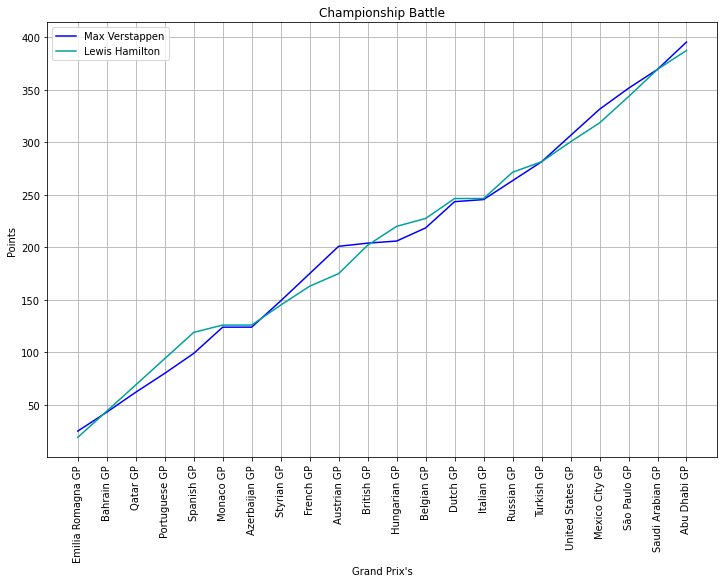

In [54]:
names = []
for x in ham["race_name"]:
    names.append(x)
    
plt.figure(figsize=(12,8))
plt.plot(names, totalPointsVer, label='Max Verstappen', color='blue')
plt.plot(names, totalPointsHam, label='Lewis Hamilton', color='#00A19C')
plt.title("Championship Battle")
plt.ylabel('Points')
plt.xlabel("Grand Prix's")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()